In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('House Pricing.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Verifica por medio de pruebas analíticas y visuales como es la distribución de las diferentes variables númericas que se encuentran en el dataset como “Salesprice”, “GrLivArea”, “'2ndFlrSF”. Calculando algunas métricas importantes como la media, la desviación estándar y sus cuártiles.

In [16]:
feature_columns = ['SalePrice', 'GrLivArea','2ndFlrSF']
estadisticas = data[feature_columns].describe()
print(estadisticas)

           SalePrice    GrLivArea     2ndFlrSF
count    1460.000000  1460.000000  1460.000000
mean   180921.195890  1515.463699   346.992466
std     79442.502883   525.480383   436.528436
min     34900.000000   334.000000     0.000000
25%    129975.000000  1129.500000     0.000000
50%    163000.000000  1464.000000     0.000000
75%    214000.000000  1776.750000   728.000000
max    755000.000000  5642.000000  2065.000000


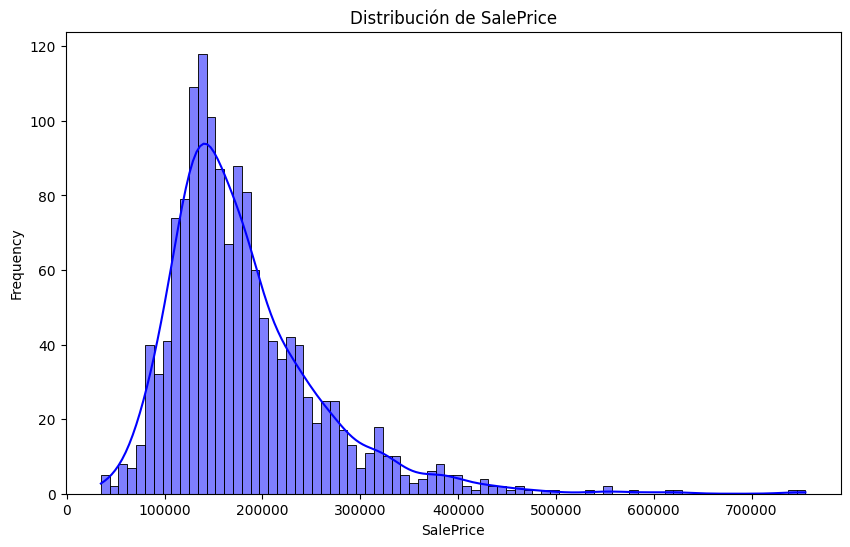

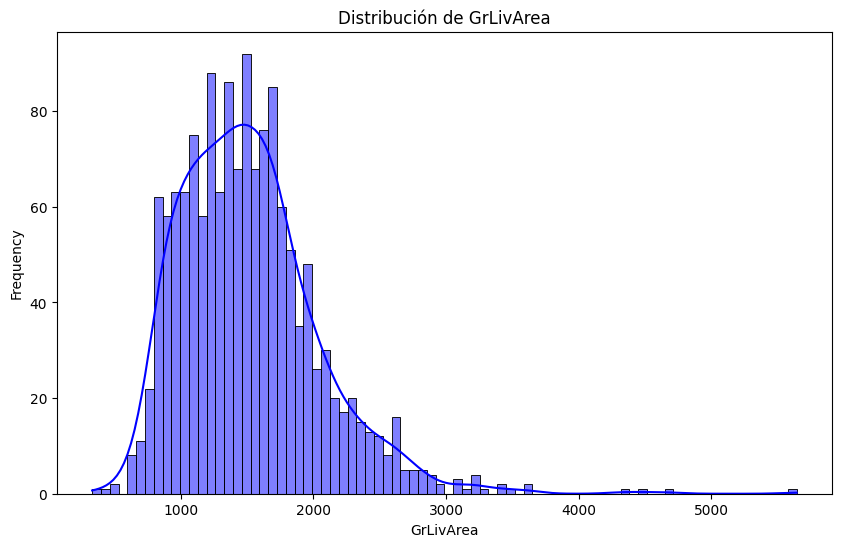

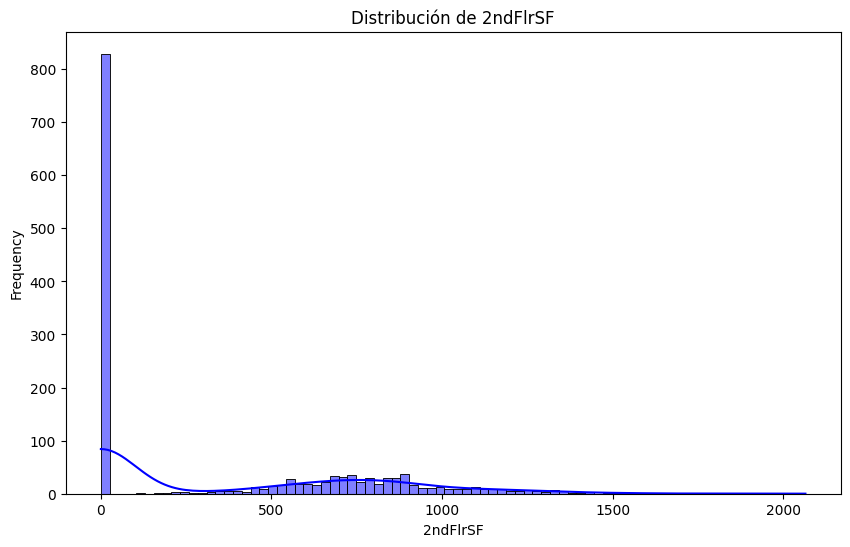

In [17]:
# Crear un histograma de las variables SalePrice, GrLivArea y 2ndFlrSF

for variable in feature_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[variable], bins=80, kde=True, color='blue')
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

Calcula las correlaciones entre estás variables y visualiza el resultado en un heatmap, ¿Qué variables correlacionan más con el Precio de Venta?

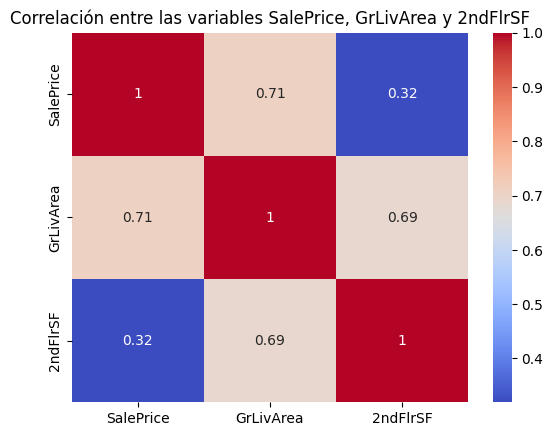

In [18]:
correlacion = data[feature_columns].corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Correlación entre las variables SalePrice, GrLivArea y 2ndFlrSF')
plt.show()

Configura un modelo de regresión con todas las variables numéricas por medio de la función OLS de la librería sm

Imprime el reporte de regresión y revisa que variables son estadísticamente significativas para nuestro modelo.

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
df_num = data [['SalePrice', 'GrLivArea', '2ndFlrSF']]
x = df_num['SalePrice']
y = df_num['GrLivArea']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              GrLivArea   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          4.52e-223
Time:                        11:41:46   Log-Likelihood:                -10708.
No. Observations:                1460   AIC:                         2.142e+04
Df Residuals:                    1458   BIC:                         2.143e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        667.4377     24.150     27.637      0.000     620.064     714.811
SalePrice      0.0047      0.000     38.348      0.000       0.004       0.005
==============================================================================
Omnibus:                      802.891   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15860.488
Skew:                           2.128   Prob(JB):                         0.00
Kurtosis:                      18.576   Cond. No.                     4.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Por último por medio de la libería variance_inflation_factor revisa que variables presentan multicolinealidad

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif_data = pd.DataFrame()
vif_data['feature'] = df_num.columns
vif_data['VIF'] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]
print(vif_data)

     feature        VIF
0  SalePrice  13.873875
1  GrLivArea  18.370039
2   2ndFlrSF   2.714886


Con todo el análisis anterior construye el modelo de regresión final excluyendo aquellas variables que consideres necesarias y mide el nivel de precisión del modelo por medio del error cuadratico medio y la R cuadrada. ¿Qué tan preciso fue tu modelo?

In [30]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r_squared = model.rsquared

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 137377.3521005685
R-squared: 0.5021486502718041
